In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tips.csv")
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
X = df.iloc[:, :-1].values
y = df["size"].values

In [6]:
y.shape

(244,)

In [7]:
y=y.reshape(len(y),1)

In [8]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder() 
X[:,4] = s.fit_transform(X[:,4])

In [9]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,2] = s.fit_transform(X[:,2])

In [10]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,3] = s.fit_transform(X[:,3])

In [11]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,5] = s.fit_transform(X[:,5])

In [12]:
X

array([[16.99, 1.01, 0, 0, 2, 0],
       [10.34, 1.66, 1, 0, 2, 0],
       [21.01, 3.5, 1, 0, 2, 0],
       ...,
       [22.67, 2.0, 1, 1, 1, 0],
       [17.82, 1.75, 1, 0, 1, 0],
       [18.78, 3.0, 0, 0, 3, 0]], dtype=object)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [14]:
X

array([[-3.14711305e-01, -1.43994695e+00, -1.34335316e+00,
        -7.84789169e-01,  2.79157595e-01, -6.21581561e-01],
       [-1.06323531e+00, -9.69205340e-01,  7.44405889e-01,
        -7.84789169e-01,  2.79157595e-01, -6.21581561e-01],
       [ 1.37779900e-01,  3.63355539e-01,  7.44405889e-01,
        -7.84789169e-01,  2.79157595e-01, -6.21581561e-01],
       ...,
       [ 3.24629502e-01, -7.22971264e-01,  7.44405889e-01,
         1.27422758e+00, -8.02024201e-01, -6.21581561e-01],
       [-2.21286504e-01, -9.04025732e-01,  7.44405889e-01,
        -7.84789169e-01, -8.02024201e-01, -6.21581561e-01],
       [-1.13228903e-01,  1.24660453e-03, -1.34335316e+00,
        -7.84789169e-01,  1.36033939e+00, -6.21581561e-01]])

In [15]:
y

array([[-0.60019263],
       [ 0.45338292],
       [ 0.45338292],
       [-0.60019263],
       [ 1.50695847],
       [ 1.50695847],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [-0.60019263],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [ 1.50695847],
       [-0.60019263],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [ 0.45338292],
       [-0.60019263],
       [-0.60019263],
       [-0.60019263],
       [ 1.50695847],
       [-0

In [16]:
y.shape

(244, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_test.shape

(61, 1)

In [20]:
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
print(y_pred.shape)
np.concatenate((y_pred, y_test),axis=1)

(61, 1)


array([[-0.60019263,  0.45338292],
       [-0.60019263,  1.50695847],
       [-0.60019263, -0.60019263],
       [-0.60019263, -1.65376818],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 1.50695847, -0.60019263],
       [ 0.45338292,  0.45338292],
       [ 1.50695847,  1.50695847],
       [ 1.50695847, -0.60019263],
       [ 1.50695847, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 0.45338292,  1.50695847],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263,  0.45338292],
       [ 2.56053402,  0.45338292],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 1.50695847,  3.61410957],
       [ 1.50695847,

In [21]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test,y_pred , squared=False)

In [22]:
rms

1.1366583344578263

In [23]:
print(df['tip'].skew())
df['tip'].describe()

1.4654510370979401


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='size'>

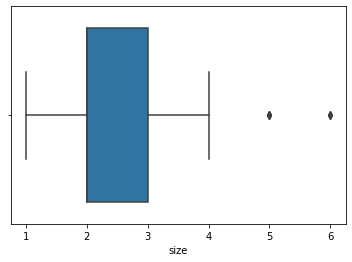

In [24]:
sns.boxplot(x=df['size'])


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

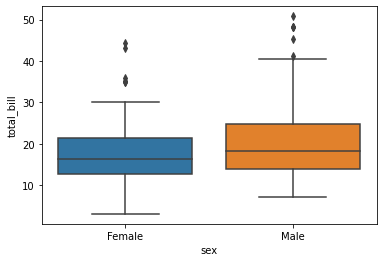

In [25]:
sns.boxplot(x='sex',y='total_bill',data=df)

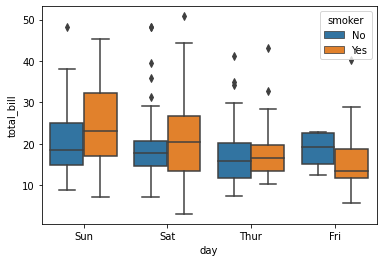

In [26]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=df)

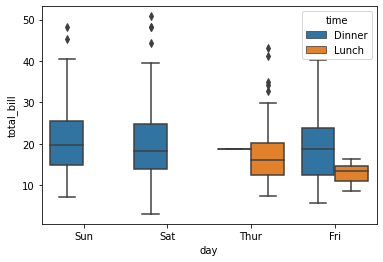

In [27]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                 data=df)

<AxesSubplot:xlabel='time', ylabel='tip'>

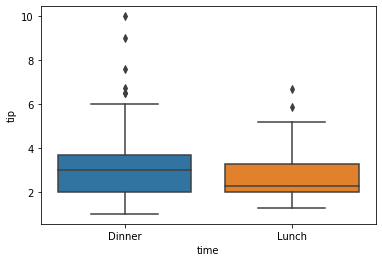

In [28]:
 sns.boxplot(x="time", y="tip", data=df,
                 order=["Dinner", "Lunch"])

In [29]:
print(df['tip'].quantile(0.10))
print(df['tip'].quantile(0.90))
print(df['tip'].skew())

1.5
5.0
1.4654510370979401


In [30]:
df["tip"] = np.where(df["tip"] <1.5, 1.5,df['tip'])
df["tip"] = np.where(df["tip"] >5, 5,df['tip'])

In [31]:
print(df['total_bill'].quantile(0.10))
print(df['total_bill'].quantile(0.90))
print(df['total_bill'].skew())

10.34
32.23500000000001
1.1332130376158205


In [32]:
df["total_bill"] = np.where(df["total_bill"] <10.34, 10.34,df['total_bill'])
df["total_bill"] = np.where(df["total_bill"] >25.67, 25.67,df['total_bill'])

In [33]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.50,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,25.67,5.00,Male,No,Sat,Dinner,3
240,25.67,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
print(df['tip'].skew())

0.5285243151273548


In [35]:
X = df.iloc[:, :-1].values
y = df["size"].values

In [36]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,4] = s.fit_transform(X[:,4])

In [37]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,2] = s.fit_transform(X[:,2])

In [38]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,3] = s.fit_transform(X[:,3])

In [39]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
X[:,5] = s.fit_transform(X[:,5])

In [40]:
y=y.reshape(len(y),1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
print(y_pred.shape)
np.concatenate((y_pred, y_test),axis=1)

(61, 1)


array([[-0.60019263,  0.45338292],
       [-0.60019263,  1.50695847],
       [ 0.45338292, -0.60019263],
       [-1.65376818, -1.65376818],
       [-0.60019263, -0.60019263],
       [-1.65376818, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 1.50695847, -0.60019263],
       [ 0.45338292,  0.45338292],
       [ 0.45338292,  1.50695847],
       [ 1.50695847, -0.60019263],
       [ 1.50695847, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 1.50695847,  1.50695847],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263,  0.45338292],
       [ 2.56053402,  0.45338292],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [-0.60019263, -0.60019263],
       [ 1.50695847,  3.61410957],
       [ 1.50695847,

In [45]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test,y_pred , squared=False)
rms

1.0643156403209304